# Depth-First Search and Breadth-First Search in Python

By Edd Mann

Source: https://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/

Graph theory and in particular the graph ADT (abstract data-type) is widely explored and implemented in the field of Computer Science and Mathematics. Consisting of vertices (nodes) and the edges (optionally directed/weighted) that connect them, the data-structure is effectively able to represent and solve many problem domains. One of the most popular areas of algorithm design within this space is the problem of checking for the existence or (shortest) path between two or more vertices in the graph. Properties such as edge weighting and direction are two such factors that the algorithm designer can take into consideration. In this post I will be exploring two of the simpler available algorithms, Depth-First and Breath-First search to achieve the goals highlighted below:

- Find all vertices in a subject vertices connected component.
- Return all available paths between two vertices.
- And in the case of BFS, return the shortest path (length measured by number of path edges).

# The Graph

So as to clearly discuss each algorithm I have crafted a connected graph with six vertices and six incident edges. The resulting graph is undirected with no assigned edge weightings, as length will be evaluated based on the number of path edges traversed. There are two popular options for representing a graph, the first being an adjacency matrix (effective with dense graphs) and second an adjacency list (effective with sparse graphs). I have opted to implement an adjacency list which stores each node in a dictionary along with a set containing their adjacent nodes. As the graph is undirected each edge is stored in both incident nodes adjacent sets.



In [2]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

Looking at the graph depiction below you will also notice the inclusion of a cycle, by the adjacent connections between ‘F’ and ‘C/E’. This has been purposely included to provide the algorithms with the option to return multiple paths between two desired nodes.

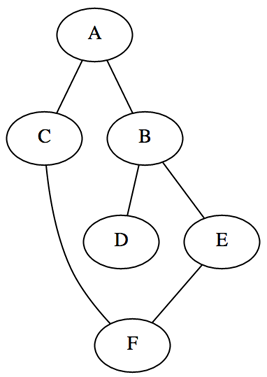

# Depth-First Search

The first algorithm I will be discussing is Depth-First search which as the name hints at, explores possible vertices (from a supplied root) down each branch before backtracking. This property allows the algorithm to be implemented succinctly in both iterative and recursive forms. Below is a listing of the actions performed upon each visit to a node.

- Mark the current vertex as being visited.
- Explore each adjacent vertex that is not included in the visited set.

## Connected Component

The implementation below uses the stack data-structure to build-up and return a set of vertices that are accessible within the subjects connected component. Using Python’s overloading of the subtraction operator to remove items from a set, we are able to add only the unvisited adjacent vertices.

In [3]:
def dfs(graph, start):
    visited, stack = set(), [start] # ❌ Because set() is not ordered, the order of node visits is lost.
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited)
    return visited

dfs(graph, 'A') # {'E', 'D', 'F', 'A', 'C', 'B'} ❌ Not code result, or correct for algorithm


{'A', 'B', 'C', 'D', 'E', 'F'}

In [12]:
# ✅ Fixed?

def dfs(graph, start):
    visited, stack = [], [start] # ✅ Use list
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.append(vertex)
            stack.extend(graph[vertex] - set(visited)) # ✅ Convert to set()
    return visited

dfs(graph, 'C') # ['A', 'B', 'E', 'F', 'C', 'D'] # Correct output

['C', 'F', 'E', 'B', 'D', 'A']

The second implementation provides the same functionality as the first, however, this time we are using the more succinct recursive form. Due to a common Python gotcha with default parameter values being created only once, we are required to create a new visited set on each user invocation. Another Python language detail is that function variables are passed by reference, resulting in the visited mutable set not having to reassigned upon each recursive call.



In [4]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set() # ❌ Because set() is not ordered, the order of node visits is lost.
    visited.add(start)
    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited

dfs(graph, 'C') # {'E', 'D', 'F', 'A', 'C', 'B'} ❌ Does not match output, and output incorrect


{'A', 'B', 'C', 'D', 'E', 'F'}

In [51]:
# ✅ Fixed?

def dfs(graph, start, visited=[]): # ✅ Use list
    visited.append(start)
    for next in graph[start] - set(visited): # ✅ Convert to set()
        dfs(graph, next, visited)
    return visited

dfs(graph, 'C') # ['C', 'F', 'E', 'B', 'A', 'D', 'A']


['C', 'F', 'E', 'B', 'A', 'D', 'A']

## Paths

We are able to tweak both of the previous implementations to return all possible paths between a start and goal vertex. The implementation below uses the stack data-structure again to iteratively solve the problem, yielding each possible path when we locate the goal. Using a generator allows the user to only compute the desired amount of alternative paths.



In [43]:
def dfs_paths(graph, start, goal):
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        for next in graph[vertex] - set(path):
            if next == goal:
                yield path + [next]
            else:
                stack.append((next, path + [next]))

list(dfs_paths(graph, 'A', 'F')) # [['A', 'C', 'F'], ['A', 'B', 'E', 'F']] ⚠️ Correct, but order is different


[['A', 'B', 'E', 'F'], ['A', 'C', 'F']]

The implementation below uses the recursive approach calling the ‘yield from’ PEP380 addition to return the invoked located paths. Unfortunately the version of Pygments installed on the server at this time does not include the updated keyword combination.

In [42]:
def dfs_paths(graph, start, goal, path=None):
    if path is None:
        path = [start]
    if start == goal:
        yield path
    for next in graph[start] - set(path):
        yield from dfs_paths(graph, next, goal, path + [next])

list(dfs_paths(graph, 'C', 'F')) # [['C', 'F'], ['C', 'A', 'B', 'E', 'F']]


[['C', 'F'], ['C', 'A', 'B', 'E', 'F']]

# Breath-First Search

An alternative algorithm called Breath-First search provides us with the ability to return the same results as DFS but with the added guarantee to return the shortest-path first. This algorithm is a little more tricky to implement in a recursive manner instead using the queue data-structure, as such I will only being documenting the iterative approach. The actions performed per each explored vertex are the same as the depth-first implementation, however, replacing the stack with a queue will instead explore the breadth of a vertex depth before moving on. This behavior guarantees that the first path located is one of the shortest-paths present, based on number of edges being the cost factor.

Connected Component
Similar to the iterative DFS implementation the only alteration required is to remove the next item from the beginning of the list structure instead of the stacks last.



In [7]:
def bfs(graph, start):
    visited, queue = set(), [start]
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(graph[vertex] - visited)
    return visited

bfs(graph, 'A') # {'B', 'C', 'A', 'F', 'D', 'E'} ❌❌❌

{'A', 'B', 'C', 'D', 'E', 'F'}

In [46]:
# ✅ Fixed?

def bfs(graph, start):
    visited, queue = [], [start] # ✅ Use list
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.append(vertex)
            queue.extend(graph[vertex] - set(visited)) # ✅ Convert list to set()
    return visited

bfs(graph, 'A') # ['A', 'C', 'B', 'F', 'D', 'E'] # ✅

['A', 'C', 'B', 'F', 'D', 'E']

# Paths

This implementation can again be altered slightly to instead return all possible paths between two vertices, the first of which being one of the shortest such path.



In [49]:
def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next in graph[vertex] - set(path):
            if next == goal:
                yield path + [next]
            else:
                queue.append((next, path + [next]))

list(bfs_paths(graph, 'A', 'F')) # [['A', 'C', 'F'], ['A', 'B', 'E', 'F']]


[['A', 'C', 'F'], ['A', 'B', 'E', 'F']]

Knowing that the shortest path will be returned first from the BFS path generator method we can create a useful method which simply returns the shortest path found or ‘None’ if no path exists. As we are using a generator this in theory should provide similar performance results as just breaking out and returning the first matching path in the BFS implementation.



In [9]:
def shortest_path(graph, start, goal):
    try:
        return next(bfs_paths(graph, start, goal))
    except StopIteration:
        return None

shortest_path(graph, 'A', 'F') # ['A', 'C', 'F']


['A', 'C', 'F']